In [2]:
#importing the necessary libraries
import numpy as np
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt

### Data collection & PreProcessing

In [3]:
#data collection
#read the data from csv file to pandas dataframe
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


here we have totally 891 rows and 12 columns

In [4]:
#printing the first five rows of the data using with .head()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#total no.of rows and columns to check below
df.shape

(891, 12)

see here we have 891 rows and 12 columns

actually in this set we have totally 12 columns 1columns is target data and remaining 11 are features

In [6]:
#find some more information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


here we observed in this information we have missing values in this dataframe and datatypes are 2float colums,inte type and object type columns.

now we do main thing is find nan values in a dataframe

In [7]:
#check the number of missing values in each column in a df
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

see here total how many nan values are present in which columns

in age column we have total 177 nan and cabin 687 and in embarked only 2 missing values,totally we have 3 columns missing values

one more point first we observe in this nan columns that cabin column have majority of missing values we can't find the mean and replaceit now what we can drop that column 

In [8]:
#finding missing values
#drop cabin column from df
df = df.drop(columns = 'Cabin',axis=1)

In [9]:
#replacing the missing values in age column with mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [10]:
#find the mode value of in embarked column for repeated more number of times
print(df['Embarked'].mode())

0    S
dtype: object


see here s value repeated more number of times.
actually why here used mode because we cant find missvalues with mean of categorical data 

now replace with emabarked two missing values with this value S

In [11]:
print(df['Embarked'].mode()[0])

S


In [12]:
#replacing the missing values in embarked column with mode value
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

filled all the missing values now again check the dataset once

In [13]:
#check again the number of missing values are filled or not in each column in a df
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

see here all missing values are filled and no null values are present

In [14]:
#now once check dataframe also 
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## EDA

In [15]:
#stastical measures of the data
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
#finding the no.of peoples are survived and not survived
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

here we observed 549 are didn't survived and 342 are survived 0 represents not survived and 1 is survived

In [17]:
import warnings 
warnings.filterwarnings('ignore')

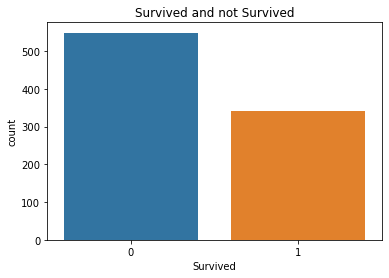

In [18]:
#data visualization
#using a seaborn make countplot for survived column
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Survived and not Survived')
sns.countplot('Survived',data = df)
plt.show()

here  not survived 0 value counts are more then peoples are survived 1 count

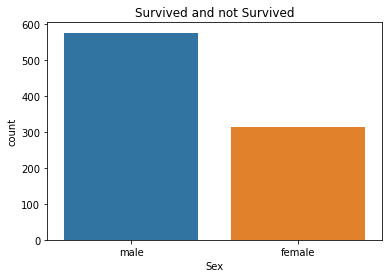

In [19]:
#now we lets check another count plot for gender
#using a seaborn make countplot for sex column
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Survived and not Survived')
sns.countplot('Sex',data = df)
plt.show()

see here male count is high rather than female here male peoples are more not survived and female are less not survived

In [20]:
#now check value counts for sex column
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

male are 577 and female are 314 survived

<function matplotlib.pyplot.show(close=None, block=None)>

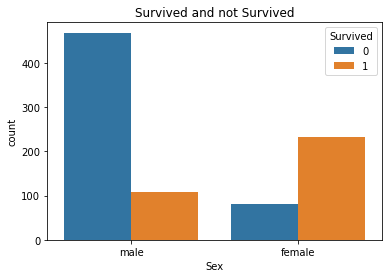

In [21]:
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Survived and not Survived')
sns.countplot('Sex',hue = 'Survived',data = df)
plt.show

see here around 100 males were survived only and around 250+ females were survived

<function matplotlib.pyplot.show(close=None, block=None)>

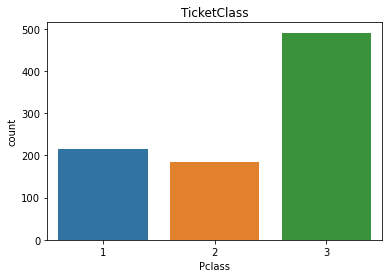

In [22]:
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('TicketClass')
sns.countplot('Pclass',data = df)
plt.show

here we have stayed in 3rd class peoples are more, first calss poeples are around 200 and second class peoples are around 190

In [23]:
#now we check count plot get exact values
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

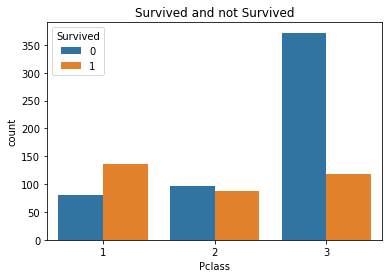

In [24]:
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Survived and not Survived')
sns.countplot('Pclass',hue = 'Survived',data = df)
plt.show

see here in first class peoples are more survived and 3rd class peoples are more not survived

<function matplotlib.pyplot.show(close=None, block=None)>

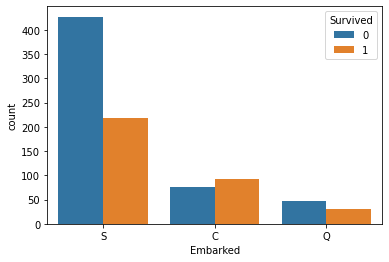

In [25]:
#plot embarked column
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
sns.countplot('Embarked',data = df,hue = 'Survived')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

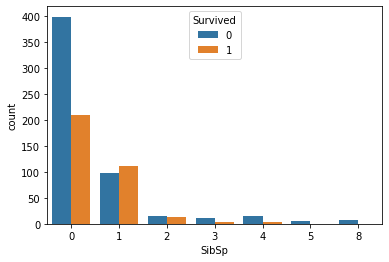

In [26]:
#plot sibsp column
plt.figsize = (5,4)
plt.ylabel("Count")
plt.xlabel("Class")
sns.countplot('SibSp',data = df,hue = 'Survived')
plt.show

these are some visualization effects of who are survived and who are not survived

In [27]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

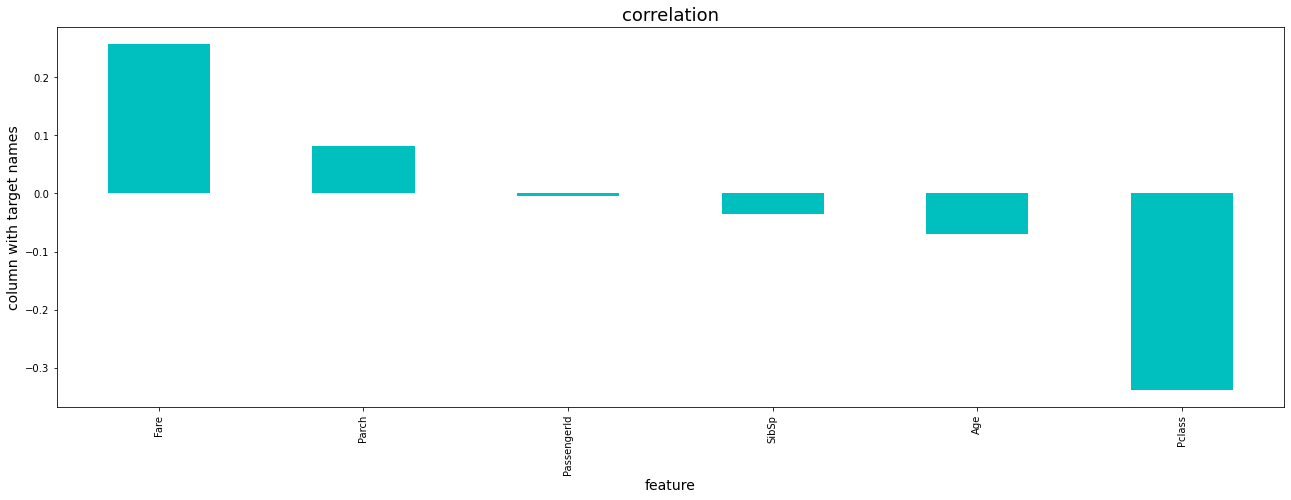

In [28]:
#visualize correlation 
plt.figure(figsize=(22,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot(kind='bar',color='c')
plt.xlabel('feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show

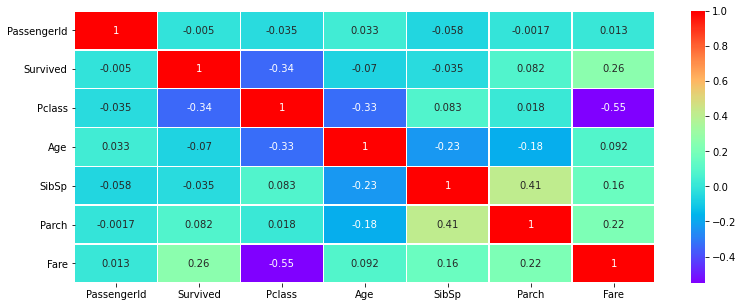

In [29]:
#lets visualize the correlation between colomns using with heatmap
fig, ax = plt.subplots(figsize=(13,5))
sns.heatmap(df.corr(), annot=True, linewidths=.5, ax=ax, cmap='rainbow')
plt.show()

In [30]:
#now conver categorical into numeric values
#encoding the columns
df.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace = True)

here encoding sex column with 0&1 and embarked columnis with replace 0,1&2

In [31]:
#now check dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


now all categorical columns converted into numeric and one more thing is here there is no use of name,passengerid and ticket columns because it represents only passenger id only i is use no use for model bulding now we can drop the columns

In [32]:
#seperate features and target
x = df.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis = 1)
y = df['Survived']

In [33]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,0
1,1,1,38.0,1,0,71.2833,1
2,3,1,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,3,0,35.0,0,0,8.0500,0


In [34]:
#check skewness
x.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of      Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]>

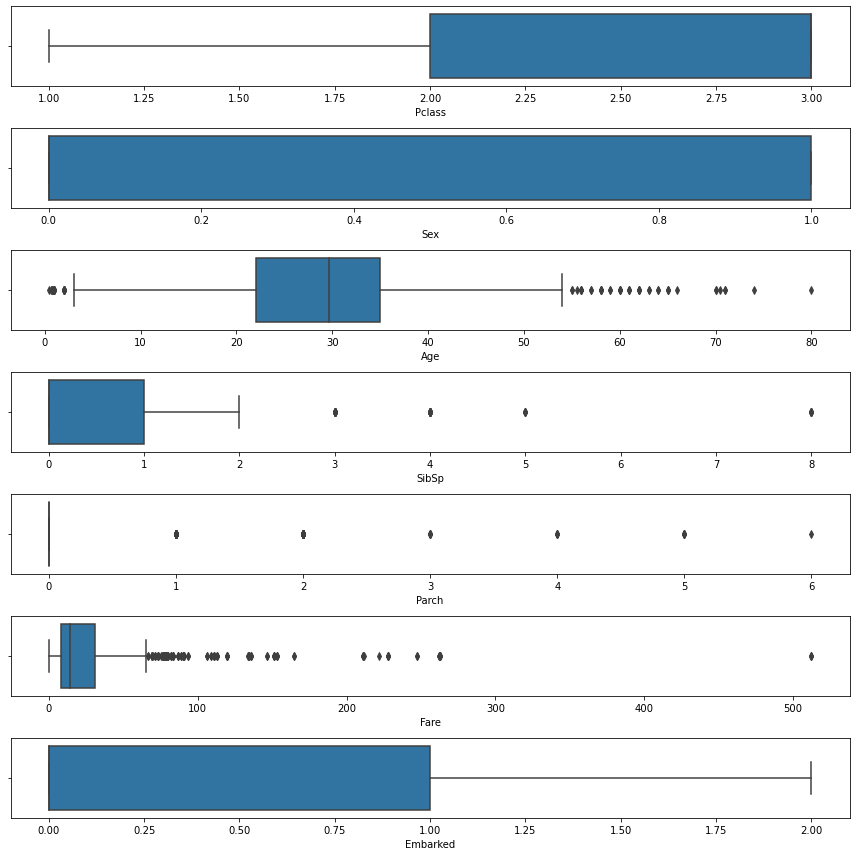

In [39]:
#check outliers in box plot
fig, axs = plt.subplots(7, figsize = (12,12))
plt1 = sns.boxplot(x['Pclass'], ax = axs[0])
plt2 = sns.boxplot(x['Sex'], ax = axs[1])
plt3 = sns.boxplot(x['Age'], ax = axs[2])
plt4 = sns.boxplot(x['SibSp'], ax = axs[3])
plt5 = sns.boxplot(x['Parch'], ax = axs[4])
plt6 = sns.boxplot(x['Fare'], ax = axs[5])
plt7 = sns.boxplot(x['Embarked'], ax = axs[6])
plt.tight_layout()

here we have some outliers are present

In [40]:
#remove outliers with power transform
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)

In [41]:
x_new.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of        Pclass       Sex       Age     SibSp     Parch      Fare  Embarked
0    0.863973 -0.737695 -0.556267  1.373636 -0.560253 -0.878820 -0.615473
1   -1.459129  1.355574  0.657269  1.373636 -0.560253  1.336651  1.578373
2    0.863973  1.355574 -0.241577 -0.679850 -0.560253 -0.790065 -0.615473
3   -1.459129  1.355574  0.437923  1.373636 -0.560253  1.067352 -0.615473
4    0.863973 -0.737695  0.437923 -0.679850 -0.560253 -0.774439 -0.615473
..        ...       ...       ...       ...       ...       ...       ...
886 -0.592604 -0.737695 -0.164262 -0.679850 -0.560253 -0.294907 -0.615473
887 -1.459129  1.355574 -0.798775 -0.679850 -0.560253  0.527906 -0.615473
888  0.863973  1.355574  0.042001  1.373636  1.846856  0.288885 -0.615473
889 -1.459129 -0.737695 -0.241577 -0.679850 -0.560253  0.527906  1.578373
890  0.863973 -0.737695  0.215254 -0.679850 -0.560253 -0.812349  1.719856

[891 rows x 7 columns]>

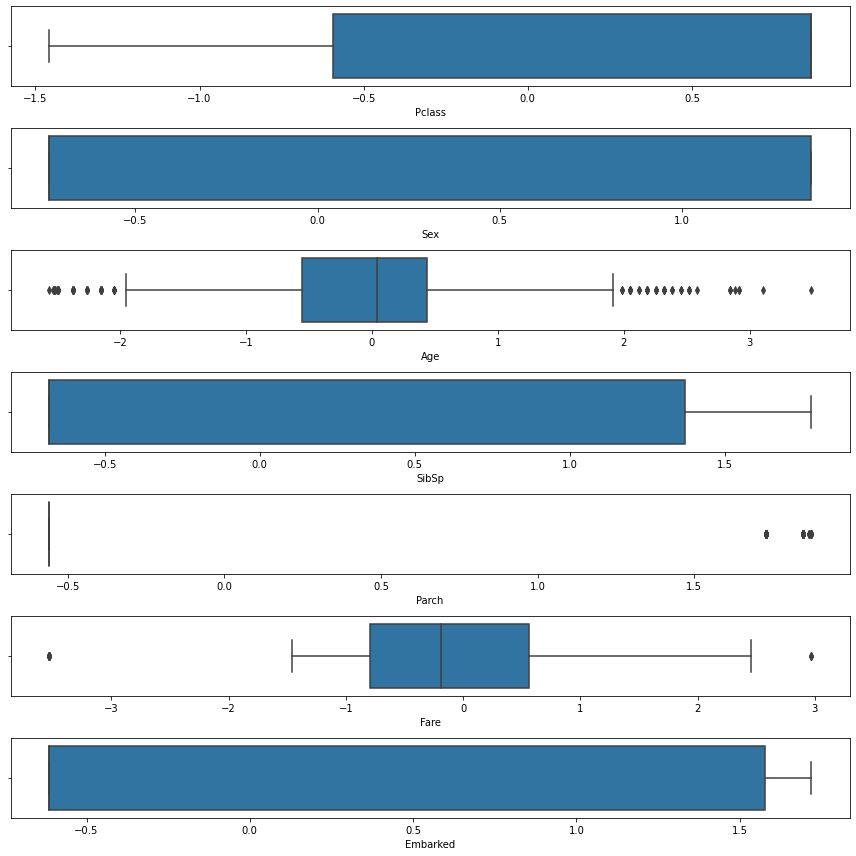

In [44]:
#check outliers in box plot
fig, axs = plt.subplots(7, figsize = (12,12))
plt1 = sns.boxplot(x_new['Pclass'], ax = axs[0])
plt2 = sns.boxplot(x_new['Sex'], ax = axs[1])
plt3 = sns.boxplot(x_new['Age'], ax = axs[2])
plt4 = sns.boxplot(x_new['SibSp'], ax = axs[3])
plt5 = sns.boxplot(x_new['Parch'], ax = axs[4])
plt6 = sns.boxplot(x_new['Fare'], ax = axs[5])
plt7 = sns.boxplot(x_new['Embarked'], ax = axs[6])
plt.tight_layout()

more of outliers are removed 

In [33]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## Model Building

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
#splitting the train_test data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [36]:
x.shape,x_train.shape,x_test.shape

((891, 7), (712, 7), (179, 7))

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score

In [38]:
#Train result
KNN = KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred =KNN .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#Test result
KNN = KNeighborsClassifier()
KNN.fit(x_test, y_test)
y_pred =KNN .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       439
           1       0.77      0.66      0.71       273

    accuracy                           0.79       712
   macro avg       0.79      0.77      0.78       712
weighted avg       0.79      0.79      0.79       712

[[384  55]
 [ 92 181]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179

[[99 11]
 [22 47]]


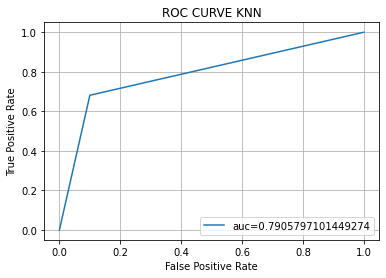

The Score for the ROC Curve is : 79.06%


In [39]:
#roc_curve plot to check the socre of knn
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [40]:
#train result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_pred =RFC .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       439
           1       0.99      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

[[436   3]
 [ 10 263]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       110
           1       0.82      0.72      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

[[99 11]
 [19 50]]


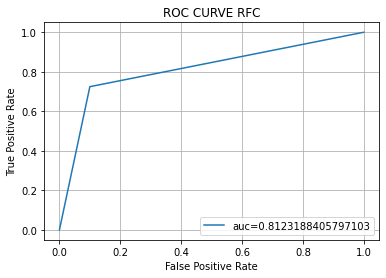

The Score for the ROC Curve is : 81.23%


In [41]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [42]:
#train result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))

#test result
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(x_train, y_train)
y_pred =DecisionTree .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       439
           1       1.00      0.95      0.98       273

    accuracy                           0.98       712
   macro avg       0.99      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712

[[439   0]
 [ 13 260]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       110
           1       0.74      0.67      0.70        69

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179

[[94 16]
 [23 46]]


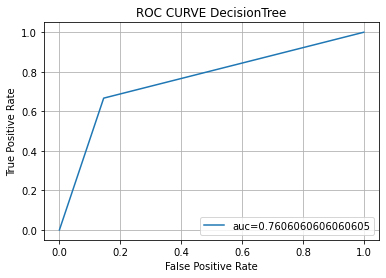

The Score for the ROC Curve is : 76.06%


In [43]:
#roc_curve plot to check the socre of Decisiontree
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE DecisionTree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [44]:
#train result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_train)
accuracy = classification_report(y_train, y_pred)
print(accuracy)
print(confusion_matrix(y_train, y_pred))


#test result
LR = LogisticRegression()
LR.fit(x_train, y_train)
y_pred =LR .predict(x_test)
accuracy = classification_report(y_test, y_pred)
print(accuracy)
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       439
           1       0.77      0.70      0.73       273

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712

[[381  58]
 [ 82 191]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[93 17]
 [18 51]]


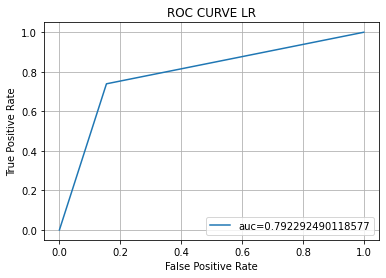

The Score for the ROC Curve is : 79.23%


In [45]:
#roc_curve plot to check the socre of LogesticRegression
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

# hyper parameter tuning

In [46]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [47]:
params = parameters={'max_depth':list(range(200,400,50)),
            'n_estimators':list(range(10,120,20)),
            'max_features': ['auto', 'sqrt', 'log2'],      
         }

In [48]:
model=RandomForestClassifier()

In [49]:
grid_clf=GridSearchCV(model,parameters,verbose=4,refit=True)

In [58]:
grid_clf.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 2/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 3/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 4/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 5/5] END max_depth=200, max_features=auto, n_estimators=10; total time=   0.0s
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.0s
[CV 2/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.0s
[CV 3/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.0s
[CV 4/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.0s
[CV 5/5] END max_depth=200, max_features=auto, n_estimators=30; total time=   0.1s
[CV 1/5] END max_depth=200, max_features=auto, n_estimators=50; total time=   0.1s
[CV 2/5] END max_depth=20

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [200, 250, 300, 350],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 30, 50, 70, 90, 110]},
             verbose=4)

In [61]:
clf=grid_clf.best_estimator_
print(clf)

RandomForestClassifier(max_depth=200, max_features='log2', n_estimators=10)


In [62]:
clf=grid_clf.best_params_
print(clf)

{'max_depth': 200, 'max_features': 'log2', 'n_estimators': 10}


In [63]:
clf=grid_clf.best_score_
print(clf)

0.8118093174431202


In [64]:
clf = RandomForestClassifier(max_depth=200, n_estimators=10)
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8156424581005587

In [65]:
y_pred=clf.predict(x_train)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,

In [66]:
y_pred=clf.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1], dtype=int64)

In [67]:
accuracy_score(y_test,y_pred)

0.8156424581005587

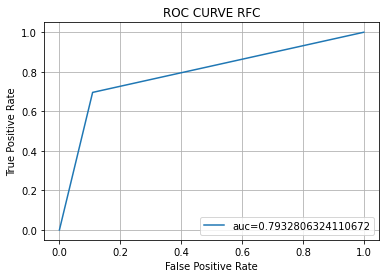

The Score for the ROC Curve is : 79.33%


In [68]:
#roc_curve plot to check the socre of RFC
fpr, tpr, _= roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc_score))
plt.box(True)
plt.title('ROC CURVE RFC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.grid(True)
plt.show()
print('The Score for the ROC Curve is : {}%'.format(round(auc_score,4)*100))

In [70]:
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8058690603226415


RandomForestClassifier model is the best accuracy result to be my final model 

# Saving the model

In [71]:
import joblib
joblib.dump(clf,'titanik.pkl')

['titanik.pkl']